<a href="https://colab.research.google.com/github/KarlYang2013/tf_study/blob/master/tf_keras_regression_wide_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#%开头这样确保可以在notebook中使用matplotlib
%matplotlib inline
import numpy as np 
import pandas as pd
import sklearn
import os 
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)
#查看有哪些数据集 目前有7个
help(keras.datasets)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.22.2.post1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf
Help on package tensorflow.keras.datasets in tensorflow.keras:

NAME
    tensorflow.keras.datasets - Public API for tf.keras.datasets namespace.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    /usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/__init__.py




In [3]:
from sklearn.datasets import fetch_california_housing

fashion_minist = keras.datasets.fashion_mnist
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:

from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


# 新段落

In [17]:
x_train.shape[1:]

(8,)

In [7]:
#标准化处理 x = (x - u) / std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#创建对象
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32))
x_test_scaled = scaler.transform(x_test.astype(np.float32))

In [8]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

81.80221745207753 -2.3594398206242224


In [9]:
# 函数式API 功能API 像使用一个函数一样使用keras的layer
input = keras.layers.Input(shape=x_train.shape[1:])#wide部分 x_train.shape[1:] = (8,),而 x_train.shape[1]=8
hidden1 = keras.layers.Dense(30, activation='relu')(input)#这里比较简单，把wide部分还用做了deep的输入
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 复合函数: f(x) = h(g(x))

concat = keras.layers.concatenate([input, hidden2])#wide部分和deep部分拼接起来用作输出层的输入
output = keras.layers.Dense(1)(concat)#因为是回归模型，所以输出层的的维度是1，所以是Dense(1)

model = keras.models.Model(inputs = [input],
                           outputs = [output])

model.summary()
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [ ]:
model.layers

In [10]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5885 - val_loss: 0.8501
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6787 - val_loss: 0.7175
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6262 - val_loss: 0.6791
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6015 - val_loss: 0.6567
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5835 - val_loss: 0.6327
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5702 - val_loss: 0.6212
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5570 - val_loss: 0.6066
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5489 - val_loss: 0.5963
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5370 - val_loss: 0.5836
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5288 - val_lo

In [11]:
print(type(history))
print(history.history)

<class 'tensorflow.python.keras.callbacks.History'>
{'loss': [1.5885226726531982, 0.6787282824516296, 0.6262330412864685, 0.6015074253082275, 0.5834859013557434, 0.5701991319656372, 0.5570229291915894, 0.5488682985305786, 0.5370222926139832, 0.5288075804710388, 0.5229281187057495, 0.5150048136711121, 0.5095952749252319, 0.5033191442489624, 0.49773186445236206, 0.4942403733730316, 0.4885198771953583, 0.48457443714141846, 0.48089873790740967, 0.47644418478012085, 0.47377681732177734, 0.4702664911746979, 0.46862420439720154, 0.4638458788394928, 0.4611939489841461, 0.45774614810943604, 0.4546198844909668, 0.4520014524459839, 0.44890186190605164, 0.4466817378997803, 0.4457567036151886, 0.44195136427879333, 0.4392327070236206, 0.43691056966781616, 0.43528982996940613], 'val_loss': [0.8500792980194092, 0.7175195217132568, 0.6790600419044495, 0.6567181348800659, 0.6326817870140076, 0.6211503744125366, 0.6065747141838074, 0.596324622631073, 0.5836486220359802, 0.578349769115448, 0.5634864568710

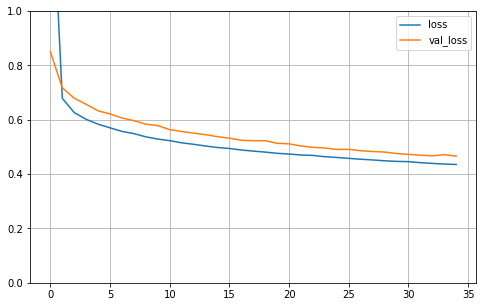

In [12]:
#可视化学习曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

#深层DNN前期loss下降慢的可能原因：
# 1. 参数众多，训练不充分，所以前期基本不变
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x)) --可以加上批归一化来缓解
plot_learning_curves(history)

In [13]:
#评估
model.evaluate(x_test_scaled, y_test, verbose = 1)

162/162 [==============================] - 0s 994us/step - loss: 0.4498


0.449818879365921